# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [3]:
# the training dataset is 50K images
# the test dataset is 10K images
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
# the images are 32x32x3
x_train[0].shape

(32, 32, 3)

In [36]:
# number of classes
y_train.shape[1]

100

In [37]:
# training samples
print(x_train[:2])

[[[[0.7019608  0.7176471  0.80784315]
   [0.6156863  0.63529414 0.73333335]
   [0.54509807 0.5647059  0.6901961 ]
   ...
   [0.16470589 0.18431373 0.34117648]
   [0.1254902  0.14901961 0.2901961 ]
   [0.09411765 0.12156863 0.23921569]]

  [[0.72156864 0.7294118  0.8039216 ]
   [0.6745098  0.6862745  0.7607843 ]
   [0.6392157  0.654902   0.7294118 ]
   ...
   [0.14901961 0.17254902 0.3254902 ]
   [0.13333334 0.16078432 0.29411766]
   [0.09411765 0.1254902  0.22745098]]

  [[0.6117647  0.6313726  0.7411765 ]
   [0.5411765  0.5568628  0.6784314 ]
   [0.47843137 0.49411765 0.6156863 ]
   ...
   [0.13333334 0.16078432 0.3019608 ]
   [0.12156863 0.15294118 0.2784314 ]
   [0.09411765 0.11764706 0.21960784]]

  ...

  [[0.10980392 0.14117648 0.26666668]
   [0.14509805 0.1882353  0.34901962]
   [0.11372549 0.14117648 0.27058825]
   ...
   [0.08627451 0.09411765 0.17254902]
   [0.08627451 0.08627451 0.13725491]
   [0.08627451 0.08627451 0.13725491]]

  [[0.09411765 0.13333334 0.25882354]
   [0.1

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [8]:
# normalize images
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [10]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


def baseline_cnn(input_shape=(32, 32, 3), num_classes=100):
    model = Sequential()

    # 1st cov layer
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd conv Layer
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd conv Layer
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 4th conv Layer
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # flattening layer
    model.add(Flatten())

    # dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    # output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [13]:
model = baseline_cnn()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 188,100 (734.77 KB)

 Trainable params: 187,588 (732.77 KB)

 Non-trainable params: 512 (2.00 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical cross entrophy
  - It's a good loss function for multi-class classification and is probabalistic so easy to interpret.
- <b>Optimizer:</b> Adam
 - It's is a good optimizer because it automatically adapts the learning rate, so we no longer need to do it manually.

In [14]:
from keras import optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=.0005), loss='categorical_crossentropy', metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

**Epochs = 20**  
I chose 20 epochs to ensure that the model sees the training samples enough times without overfitting. I used 15 epochs with the MNIST dataset, but it was a far simpler task.

In [15]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.0275 - loss: 4.5191 - val_accuracy: 0.0860 - val_loss: 3.9853
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.0892 - loss: 3.9418 - val_accuracy: 0.1367 - val_loss: 3.6492
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1258 - loss: 3.6681 - val_accuracy: 0.1682 - val_loss: 3.4923
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1603 - loss: 3.4408 - val_accuracy: 0.1966 - val_loss: 3.3310
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1902 - loss: 3.2489 - val_accuracy: 0.2411 - val_loss: 3.0791
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2230 - loss: 3.0751 - val_accuracy: 0.2514 - val_loss: 2.9878
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2470 - loss: 2.9454 - val_accuracy: 0.2124 - val_loss: 3.2304
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2725 - loss: 2.7979 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 32.3%
- <b>Other metric:</b> Log Loss
- <b>Reason for selection:</b> It's a good fit for mult-class image classification, and it penalizes incorrect predictions based on the model's confidence in their predictions.
- <b>Value of metric:</b> 2.95
- <b>Interpretation of metric value:</b> The model is better than random guessing (4.6) but long way from a perfect model (1.0)

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Log Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3189 - loss: 2.9601
Log Loss:     2.95
Accuracy: 32.32%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

In [17]:
import matplotlib.pylab as plt

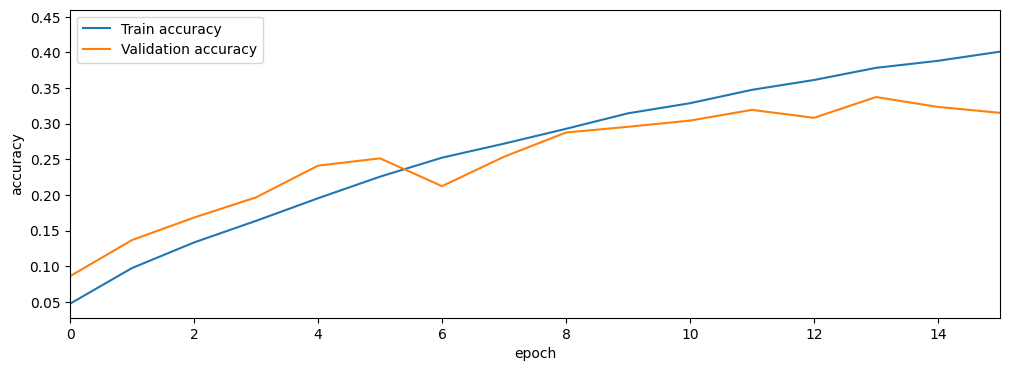

In [18]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 4))

plt.plot(train_acc, label=f"Train accuracy")
plt.plot(val_acc, label=f"Validation accuracy")

plt.xlim([0,15])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [19]:
import numpy as np

In [20]:
# Get the predictions for the test data
x_preds = model.predict(x_test)

# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(x_preds, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Get the highest probabilities for the predictions
highest_probs = np.max(x_preds, axis=1)


# MISCLASSIFIED IMAGES
# Find misclassified indices
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Get the misclassified samples and true labels
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = np.argmax(y_test[misclassified_indices], axis=1)

# Pick 4 random misclassified samples to plot
misclassified_random_indices = np.random.choice(len(misclassified_indices), 4, replace=False)


# CLASSIFIED IMAGES
# Find classified indices
classified_indices = np.where(predicted_classes == true_classes)[0]

# Get the classified samples and true labels
classified_samples = x_test[classified_indices]
classified_labels = np.argmax(y_test[classified_indices], axis=1)

# Pick 4 random correctly classified samples
classified_random_indices = np.random.choice(len(classified_indices), 4, replace=False)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [21]:
# Define CIFAR-100 fine labels from https://huggingface.co/datasets/uoft-cs/cifar100
fine_labels = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle",
    "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel",
    "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock",
    "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
    "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion",
    "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree",
    "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine",
    "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea",
    "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank",
    "telephone", "television", "tiger", "tractor", "train", "trout", "tulip",
    "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

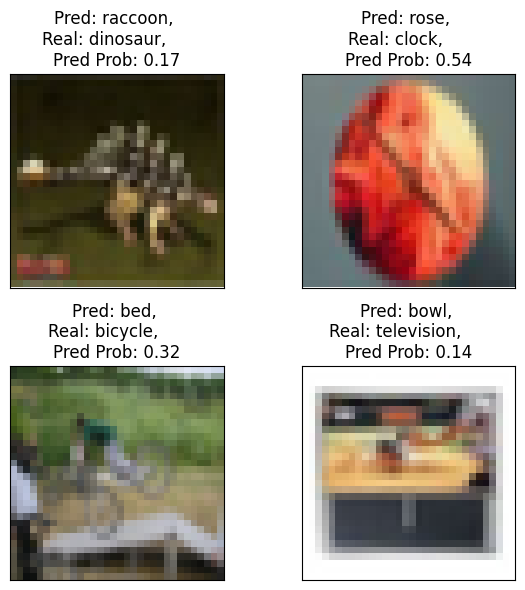

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(misclassified_samples[misclassified_random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Pred: {fine_labels[predicted_classes[misclassified_indices[misclassified_random_indices[i]]]]}, \nReal: {fine_labels[misclassified_labels[misclassified_random_indices[i]]]}, \
    \nPred Prob: {highest_probs[misclassified_indices[misclassified_random_indices[i]]]:.2f}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

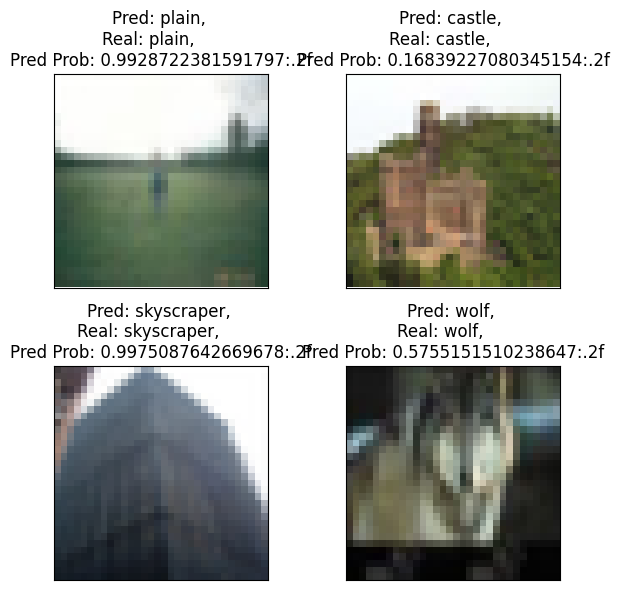

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(classified_samples[classified_random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Pred: {fine_labels[predicted_classes[classified_indices[classified_random_indices[i]]]]}, \nReal: {fine_labels[classified_labels[classified_random_indices[i]]]}, \
    \nPred Prob: {highest_probs[classified_indices[classified_random_indices[i]]]}:.2f")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Discussion

Overall, the results make sense. Generally, the correct predictions have higher probabilities than the incorrect predictions.

The model has trouble classifying images with complex features (e.g. dinosaur) or those with background noise (e.g. castle, bicycle). It also gets a few simple images wrong, such as a clock, suggesting it has significant room for improvement.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

### Advanced Techniques
I used two advanced technique: Data Augmentation and Early Stopping.

After looking through the incorrectly classified images, I realized that the model was not learning complex features. Hence, I used data augmentation to help the model learn these features by transforming the training data.

However, I was mindful of the model overfitting, so I used early stopping to avoid it.

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,         # Randomly rotate images by up to 15 degrees
    width_shift_range=0.1,     # Randomly shift the width by up to 10%
    height_shift_range=0.1,    # Randomly shift the height by up to 10%
    horizontal_flip=True,      # Randomly flip images horizontally
    zoom_range=0.1,            # Randomly zoom in/out by up to 10%
    fill_mode='nearest'        # Fill in missing pixels
)

# Fit the data generator to the training data
datagen.fit(x_train)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [28]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',           # Monitor validation loss
    patience=5,                   # Number of epochs with no improvement
    restore_best_weights=True,    # Restore the model with the best weights
    verbose=1                     # Print when early stopping is triggered
)

In [29]:
adv_history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                        epochs=50,
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.2721 - loss: 2.9791 - val_accuracy: 0.3188 - val_loss: 2.7356
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - accuracy: 0.2886 - loss: 2.8384 - val_accuracy: 0.3407 - val_loss: 2.5925
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.2947 - loss: 2.8048 - val_accuracy: 0.3510 - val_loss: 2.5530
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3026 - loss: 2.7665 - val_accuracy: 0.3255 - val_loss: 2.6584
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.3079 - loss: 2.7398 - val_accuracy: 0.2433 - val_loss: 3.3912
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.3129 - loss: 2.6974 - val_accuracy: 0.3344 - val_loss: 2.6409
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.3212 - loss: 2.6715 - val_accuracy: 0.3070 - val_loss: 2.7741
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.3307 - loss: 2.62

In [56]:
# history = adv_model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[lr_scheduler])

In [31]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Log Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3870 - loss: 2.3915
Log Loss:     2.37
Accuracy: 39.13%


In [32]:
# Get the predictions for the test data
x_preds = model.predict(x_test)

# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(x_preds, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Get the highest probabilities for the predictions
highest_probs = np.max(x_preds, axis=1)


# MISCLASSIFIED IMAGES
# Find misclassified indices
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Get the misclassified samples and true labels
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = np.argmax(y_test[misclassified_indices], axis=1)

# Pick 4 random misclassified samples to plot
misclassified_random_indices = np.random.choice(len(misclassified_indices), 4, replace=False)


# CLASSIFIED IMAGES
# Find classified indices
classified_indices = np.where(predicted_classes == true_classes)[0]

# Get the classified samples and true labels
classified_samples = x_test[classified_indices]
classified_labels = np.argmax(y_test[classified_indices], axis=1)

# Pick 4 random correctly classified samples
classified_random_indices = np.random.choice(len(classified_indices), 4, replace=False)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


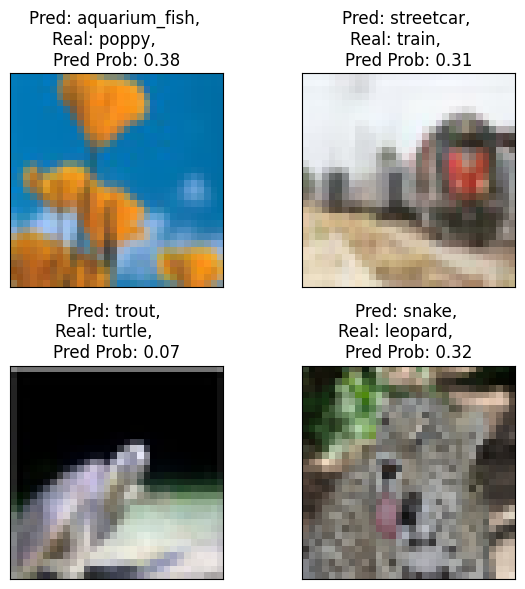

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(misclassified_samples[misclassified_random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Pred: {fine_labels[predicted_classes[misclassified_indices[misclassified_random_indices[i]]]]}, \nReal: {fine_labels[misclassified_labels[misclassified_random_indices[i]]]}, \
    \nPred Prob: {highest_probs[misclassified_indices[misclassified_random_indices[i]]]:.2f}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

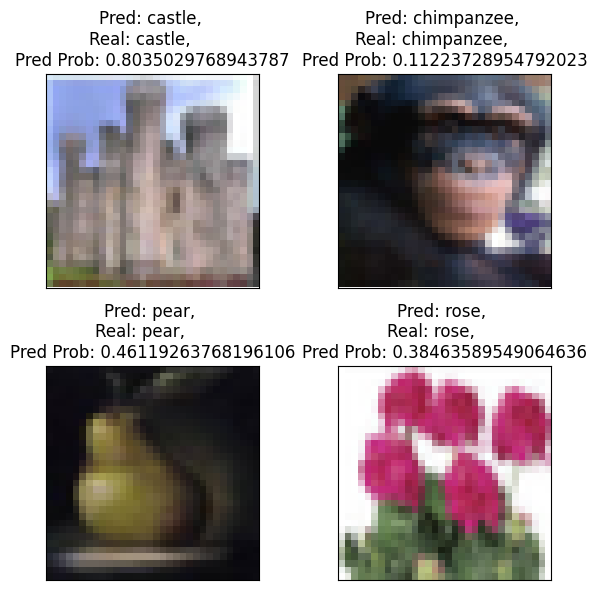

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(classified_samples[classified_random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Pred: {fine_labels[predicted_classes[classified_indices[classified_random_indices[i]]]]}, \nReal: {fine_labels[classified_labels[classified_random_indices[i]]]}, \
    \nPred Prob: {highest_probs[classified_indices[classified_random_indices[i]]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Discussion
The model's accuracy improved by 6.8% from 32.3% to 39.1%. The performance improved because I re-used the weights from my baseline model, and retrained them after augmenting the training images. I used early stopped to avoid overfitting, which allowed me to improve the model's test performance significantly.

However, the model's accuracy is still only 39.1% with a Log Loss of 2.4 so there is ample room for improvement. According to the literature, a good CIFAR-100 model should have a Log Loss of less than 2.

To further optimize the model performance, I would try adding more filters and convolution layers while accounting for overfitting by using Global Average Pooling or/and DropBlock:
* Global Average Pooling: It replaces the flattening layer to reduce the number of parameters and hence avoid overfitting
* DropBlock: It randomly drops entire regions to force the CNN to learn distributed features. This may come in handy with learning multiple, intersecting features.

If that didn't improve the model performance significantly (10% or higher), I would consider using transfer learning:
* Transfer Learning: Use a pretrained feature extracted, such as ResNet50, to learn powerful features that the model is currently struggling with.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [x] Created a branch with the correct naming convention.
- [x] Ensured that the repository is public.
- [x] Reviewed the PR description guidelines and adhered to them.
- [x] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.